[[0.   1.19 1.   1.   1.19 1.19 1.19 1.   1.19 1.19 1.19 1.  ]
 [1.19 0.   0.   0.   1.19 1.19 1.19 0.   1.19 1.19 1.19 0.  ]
 [1.   0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.19 1.19 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [1.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
w above
case = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 0.0
case = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 12.329999999999998
case = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] cost = 8.329999999999998
case = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

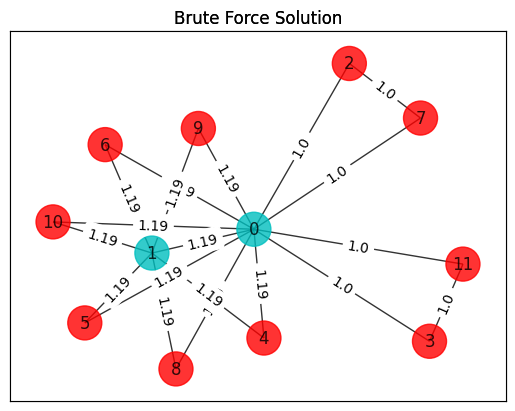

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import datetime

# Setting a variable to the current time using now()
current_time = datetime.datetime.now()

# Generating a graph of n nodes
n=12 # Number of nodes in graph
G=nx.Graph()
G.add_nodes_from(np.arange(0,n,1))
elist=[ 

    (0,1,1.19), 

    (0,2,1.0), 

    (0,3,1.0), 

    (0,4,1.19), 

    (0,5,1.19), 

    (0,6,1.19), 

    (0,7,1.0), 

    (0,8,1.19), 

    (0,9,1.19), 

    (0,10,1.19), 

    (0,11,1.0), 

    (1,0,1.19), 

    (1,4,1.19), 

    (1,5,1.19), 

    (1,6,1.19), 

    (1,8,1.19), 

    (1,9,1.19), 

    (1,10,1.19), 

    (2,0,1.0), 

    (2,7,1.0), 

    (3,0,1.0), 

    (3,11,1.0), 

    (4,0,1.19), 

    (4,1,1.19), 

    (5,0,1.19), 

    (5,1,1.19), 

    (6,0,1.19), 

    (6,1,1.19), 

    (7,0,1.0), 

    (7,2,1.0), 

    (8,0,1.19), 

    (8,1,1.19), 

    (9,0,1.19), 

    (9,1,1.19), 

    (10,0,1.19), 

    (10,1,1.19), 

    (11,0,1.0), 

    (11,3,1.0)]

# tuple is (i,j,weight) where (i,j) is the edge
G.add_weighted_edges_from(elist)


colors = ['r' for node in G.nodes()]
pos = nx.spring_layout(G)

def draw_graph(G, colors, pos):
    default_axes = plt.axes(frameon=True)
    # Titles Graph
    plot_title = "Brute Force Solution"
    
    # Label variable for X-axis
    xax = ""
    
    # Label variable for Y-axis
    yax = ""
    
    # Calls to title
    plt.title(plot_title)
    plt.xlabel(xax)
    plt.ylabel(yax)
    
    # Main drawing call of the graph
    nx.draw_networkx(G, node_color=colors, node_size=600, alpha=.8, ax=default_axes, pos=pos)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
    
    # edge_color : color or array of colors (default='k')
    # Find a way to make cut lines into dotted lines
    
    # Create 2 edgelists. 1 with the non-cut edges, and another with only the cut edges
    
    # cut_edges = [(u, v) for u, v in G.edges if lut[u] != lut[v]]
    # uncut_edges = [(u, v) for u, v in G.edges if lut[u] == lut[v]]
    
    # nx.draw_networkx_edges(G, pos, edgelist=cut_edges,
    #                       style='dashdot', alpha=0.5, width=3)
    # nx.draw_networkx_edges(G, pos, edgelist=uncut_edges, style='solid', width=3)


# Executing our draw_graph function to draw the graph
draw_graph(G, colors, pos)

""" # Formats date for use in file saving
curTime = current_time.hour + ":" + current_time.minute + "_" + current_time.month + "/" + current_time.date + "/" + current_time.year
nx.draw(draw_graph(G, colors, pos))

# Saves graph as file in directory with timestamp
plt.savefig("BestBrute" + curTime ".png") """

# Computing the weight matrix from the random graph
w = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        temp = G.get_edge_data(i,j,default=0)
        if temp != 0:
            w[i,j] = temp['weight']
print(w)
print("w above")

best_cost_brute = 0
for b in range(2**n):
    x = [int(t) for t in reversed(list(bin(b)[2:].zfill(n)))]
    cost = 0
    for i in range(n):
        for j in range(n):
            cost = cost + w[i,j]*x[i]*(1-x[j])
    if best_cost_brute < cost:
        best_cost_brute = cost
        xbest_brute = x
    print('case = ' + str(x)+ ' cost = ' + str(cost))

colors = ['r' if xbest_brute[i] == 0 else 'c' for i in range(n)]

# Final draw of graph
draw_graph(G, colors, pos)
print('\nBest solution = ' + str(xbest_brute) + ' cost = ' + str(best_cost_brute))

In [2]:
## Variation Quantum Eigensolver

#Source: https://qiskit.org/documentation/optimization/tutorials/06_examples_max_cut_and_tsp.html

# Some helpful documentation link:
#  * https://qiskit.org/documentation/stubs/qiskit.algorithms.VQE.html#qiskit.algorithms.VQE

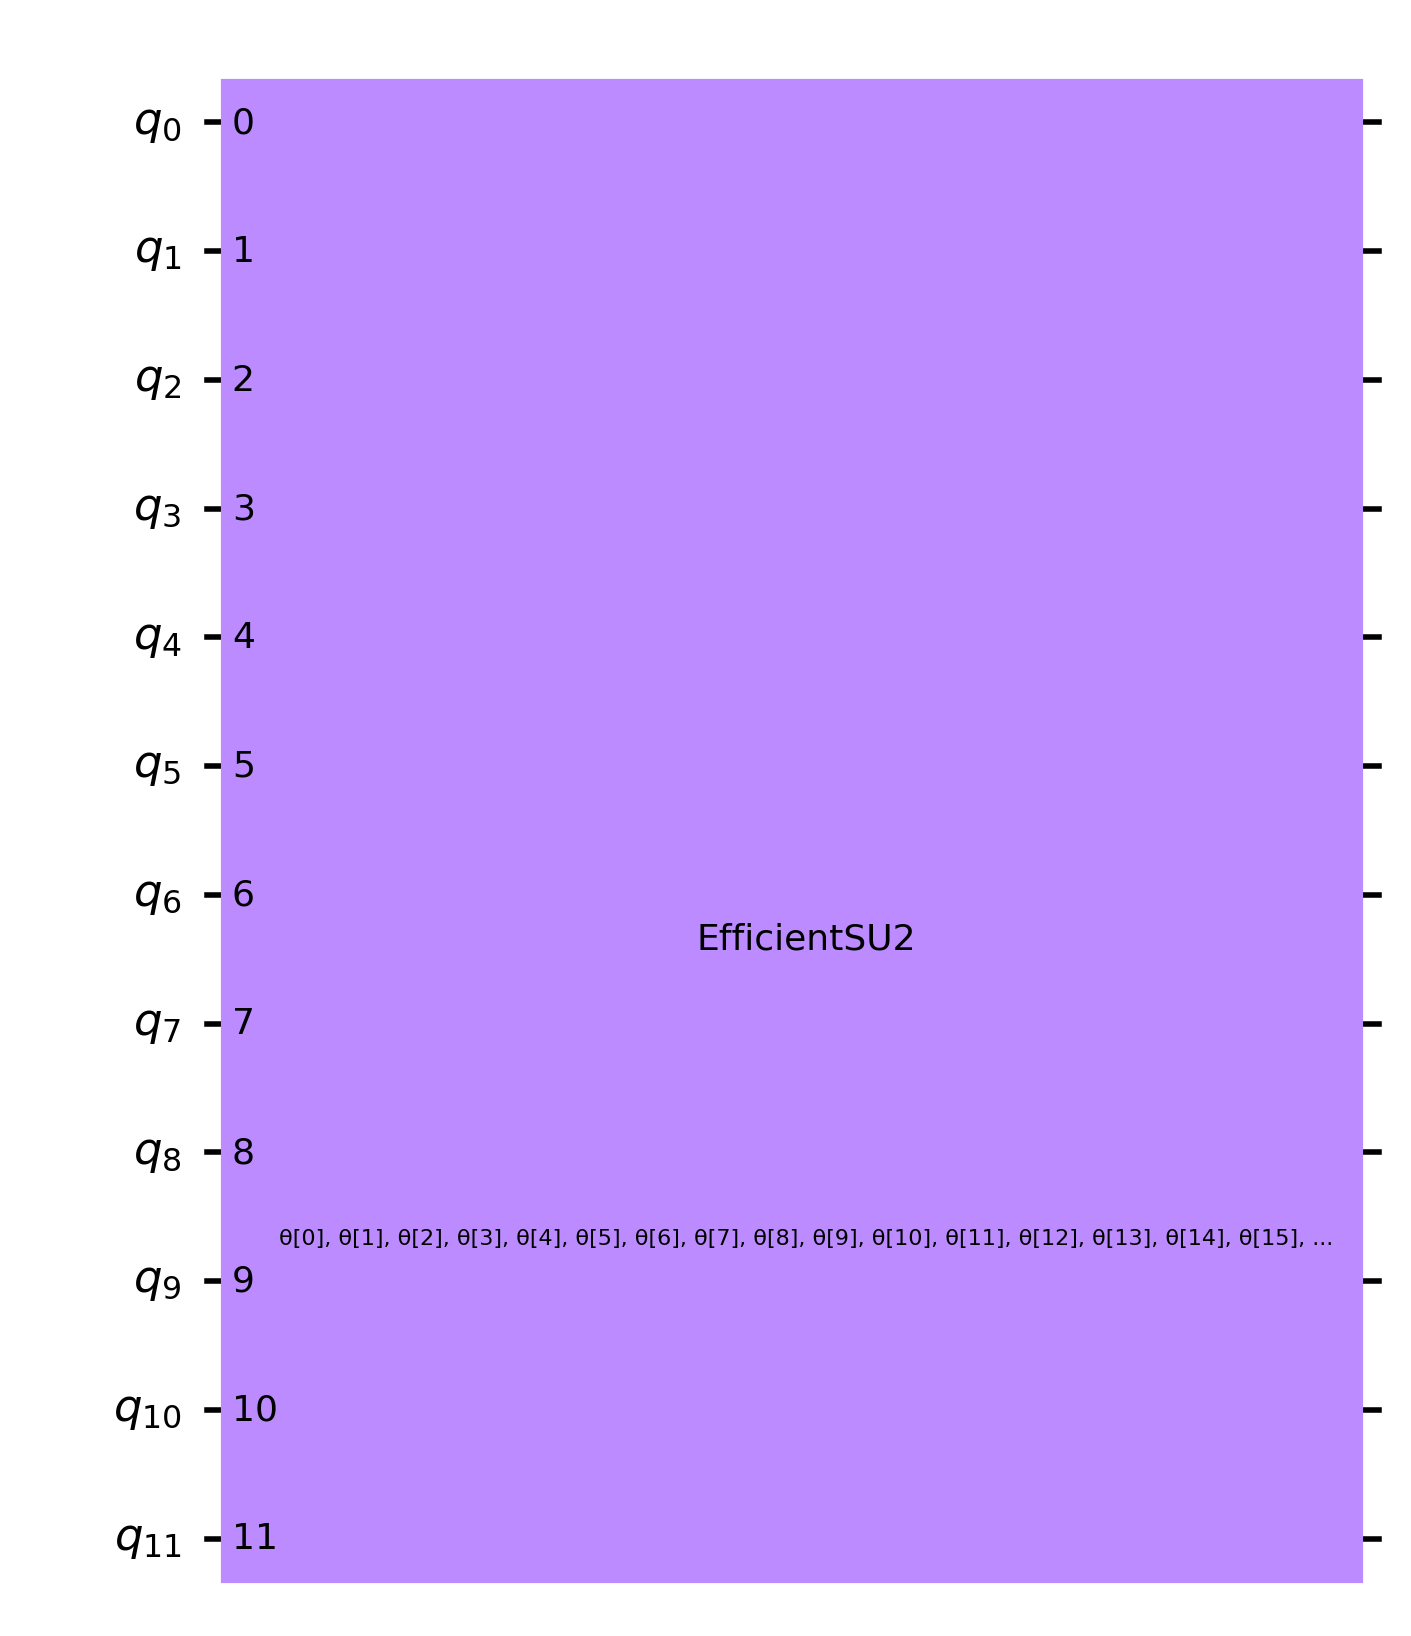

In [3]:
# General imports
import time
import numpy as np

# VQE Imports
from qiskit.algorithms.minimum_eigensolvers import VQE
from qiskit.algorithms.optimizers import OptimizerResult
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA
from qiskit.primitives import Estimator
# from qiskit_aer.primitives import Estimator as AerEstimator
from qiskit.circuit.library import EfficientSU2



# SciPy minimizer routine
from scipy.optimize import minimize

# Pre-defined ansatz circuit and operator class for Hamiltonian (Unused)
from qiskit.circuit.library import TwoLocal
from qiskit.quantum_info import SparsePauliOp

# The IBM Qiskit Runtime
from qiskit_ibm_runtime import (QiskitRuntimeService, Session,
                                Estimator as RuntimeEstimator)
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session, Options
service = QiskitRuntimeService()

# Desired instance goes here, 
# for running jobs on the quantum machine, use "ibm_guadalupe"
# For running jobs on a simulator, use "simulator_statevector"
backend = "simulator_statevector"

# Plotting functions
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# Maxcut import
from qiskit_optimization.applications import Maxcut


# Define our Qiskit Maxcut Instance
max_cut = Maxcut(w)
qp = max_cut.to_quadratic_program()

# Translate to Ising Hamiltonian
qubitOp, offset = qp.to_ising()

# Construct VQE
# opt = SPSA(maxiter=300)
# ansatz = TwoLocal(qubitOp.num_qubits, 'ry', 'cz', reps=5, entanglement='linear')

# estimator = Estimator(options={"shots": 2048})
# seed = 10598


# Note: Look into using different ansatz than EfficientSU2, as some may be a better fit for our application
ansatz = EfficientSU2(qubitOp.num_qubits)
ansatz.draw("mpl")

In [ ]:
# Define a simple callback function
intermediate_info_sim_backend = []


def callback_sim(value):
    intermediate_info_sim_backend.append(value)


In [ ]:
import signal
import time

from qiskit_ibm_runtime import Estimator, Session
from qiskit.providers import JobStatus


def timeout_handler(signum, frame):
    raise Exception('Iteration timed out')


class RetryEstimator(Estimator):
    """RuntimeRetryEstimator class.
    
    This class inherits from Qiskit IBM Runtime's Estimator and overwrites its run method such that it retries calling it
    a maximum of 'max_retries' consecutive times, if it encounters one of the following randomly occuring errors:
    
    * An Estimator error (in this case "Job.ERROR" is printed, and the job is cancelled automatically)
    * A timeout error where the job either remains running or completes but does not return anything, for a time larger 
      than 'timeout' (in this case the job is cancelled by the patch and "Job.CANCELLED" is printed)
    * A creation error, where the job fails to be created because connection is lost between the runtime server and the
      quantum computer (in this case "Failed to create job." is printed). If this error occurs, the patch connects the user
      to a new Session (to be handled with care! also, this will unfortunately put the next job in the queue). 
    """

    def __init__(self, *args, max_retries: int = 5, timeout: int = 3600, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.max_retries = max_retries
        self.timeout = timeout
        self.backend = super().session._backend
        signal.signal(signal.SIGALRM, timeout_handler)

    def run(self, circuits, observables, parameter_values, **kwargs):
        result = None
        for i in range(self.max_retries):
            try:
                job = super().run(circuits, observables, parameter_values, **kwargs)
                while job.status() in [JobStatus.INITIALIZING, JobStatus.QUEUED, JobStatus.VALIDATING]:
                    # Check every 5 seconds whether job status has changed
                    time.sleep(5)
                # Once job starts running, set timeout to 1 hour by default
                signal.alarm(self.timeout)
                result = job.result()
                if result is not None:
                    signal.alarm(0)  # reset timer
                    return job
            except Exception as e:
                print("\nSomething went wrong...")
                print(f"\n\nERROR MESSAGE:\n{e}\n\n")
                if 'job' in locals():  # Sometimes job fails to create
                    print(f"Job ID: {job.job_id}. Job status: {job.status()}.")
                    if job.status() not in [JobStatus.DONE, JobStatus.ERROR, JobStatus.CANCELLED]:
                        job.cancel()
                else:
                    print("Failed to create job.")
                print(f"Starting trial number {i+2}...\n")
                print(f"Creating new session...\n")
                signal.alarm(0)  # reset timer
                super().session.close()
                self._session = Session(backend=self.backend)
        if result is None:
            raise RuntimeError(
                f"Program failed! Maximum number of retries ({self.max_retries}) exceeded")


In [ ]:
# Setup Estimator with session error handling reconnection work around
start = time.time()
with Session(service=service, backend=backend) as session:
    # Prepare extended primitive
    rt_estimator = RetryEstimator(session=session)
    # set up algorithm
    custom_vqe = CustomVQE(rt_estimator, ansatz_opt,
                           optimizer, callback=callback_real)
    # run algorithm
    result = custom_vqe.compute_minimum_eigenvalue(ham_16)
end = time.time()
print(f'execution time (s): {end - start:.2f}')


In [9]:
# Establishes a session with backend being the desired machine
with Session(backend=backend) as session:
    estimator = Estimator(options={"shots": 2048})
    
    
    
    
""" # print results
x = max_cut.sample_most_likely(res.eigenstate)
print('energy:', res.eigenvalue.real)
print('time:', res.optimizer_time)
print('max-cut objective:', res.eigenvalue.real + offset)
print('solution:', x)
print('solution objective:', qp.objective.evaluate(x)) """


solver = NumPyMinimumEigensolver
result = res.compute_minimum_eigenvalue(operator=qubitOp)
ref_value = result.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")
# print(res)
print(result.eigenvalue.real)

# plot results
colors = ['r' if x[i] == 0 else 'c' for i in range(n)]
draw_graph(G, colors, pos)

Optimization Solution :  [6.85372618 1.92139188 4.48316351 2.92003078 5.02743518 2.58060801
 4.80175956 5.52291942 2.74544854 4.48669778 5.35261414 3.99682914
 4.68938463 5.44814541 6.25770684 0.86487941 4.16786765 6.10184047
 1.75949659 2.52546603 2.012614   1.59314368 4.75941401 4.60686861
 5.81579607 0.44583014 3.52671721 5.39993414 1.25230878 2.84551293
 1.33827629 0.68141293 1.78103009 2.97151254 2.45620397 1.00150641
 1.97796967 2.0275714  2.67657289 5.91252713 1.89951014 1.39802534
 3.63348407 3.91623087 5.74726425 1.70321752 6.13499904 5.04286712
 0.05001624 1.22117538 5.67021889 0.3535938  4.67913858 0.44543751
 2.97246066 5.43109297 5.41076182 5.83572877 0.33342046 4.34558347
 5.7497638  3.44201775 3.3088293  1.24132863 5.62120686 3.00207158
 4.72131613 0.18304758 2.04005437 6.15901745 4.25346464 0.3842455
 5.58806818 0.25165438 3.05900439 4.27040381 3.75765418 6.23988552
 5.8293979  4.07450401 1.33508815 1.33316247 2.35978475 2.53510158
 6.01216159 1.59923895 3.30236007 5.83

AttributeError: compute_minimum_eigenvalue

In [ ]:
from qiskit.algorithms import MinimumEigensolver, VQEResult

class CustomVQE(MinimumEigensolver):

    def __init__(self, estimator, circuit, optimizer, callback=None):
        self._estimator = estimator
        self._circuit = circuit
        self._optimizer = optimizer
        self._callback = callback

    def compute_minimum_eigenvalue(self, operators, aux_operators=None):

        # Define objective function to classically minimize over
        def objective(x):
            # Execute job with estimator primitive
            job = self._estimator.run([self._circuit], [operators], [x])
            # Get results from jobs
            est_result = job.result()
            # Get the measured energy value
            value = est_result.values[0]
            # Save result information using callback function
            if self._callback is not None:
                self._callback(value)
            return value

        # Select an initial point for the ansatzs' parameters
        x0 = np.pi/4 * np.random.rand(self._circuit.num_parameters)

        # Run optimization
        res = self._optimizer.minimize(objective, x0=x0)

        # Populate VQE result
        result = VQEResult()
        result.cost_function_evals = res.nfev
        result.eigenvalue = res.fun
        result.optimal_parameters = res.x
        return result



In [ ]:
# Define a simple callback function
intermediate_info = []


def callback(value):
    intermediate_info.append(value)


In [ ]:
# Define instance of qiskit-terra's Estimator primitive
estimator = Estimator([ansatz_opt], [ham_16])

# Setup VQE algorithm
custom_vqe = CustomVQE(estimator, ansatz_opt, optimizer, callback=callback)

# Run the custom VQE function and monitor execution time
start = time()
result = custom_vqe.compute_minimum_eigenvalue(ham_16)
end = time()

print(result)
print(f'execution time (s): {end - start:.2f}')


In [ ]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer


# create minimum eigen optimizer based on SamplingVQE
vqe_optimizer = MinimumEigenOptimizer(res)

# solve quadratic program
result = vqe_optimizer.solve(qp)
print(result.prettyprint())

colors = ["r" if result.x[i] == 0 else "c" for i in range(n)]
draw_graph(G, colors, pos)


## VQE Circuit

*Not quite sure what effect this has on current code

In [ ]:
# from ibm_quantum_widgets import CircuitComposer
from qiskit import *
from qiskit.circuit import QuantumCircuit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit



optimal_qc = res.get_optimal_circuit()
editor = CircuitComposer(circuit=optimal_qc)

In [ ]:
# This code is being generated automatically by the IBM Quantum Circuit Composer widget.
# It changes in every update of the widget, so any modifications done in this cell will be lost.
# State: synchronized

# Attention:
# ----------
# Custom gates are not supported yet in version v2.0.18
# Find following an equivalent qasm based circuit:
from qiskit import QuantumCircuit
qasm = """
OPENQASM 2.0;
include "qelib1.inc";
gate woLocal(param0, param1, param2, param3, param4, param5, param6, param7, param8, param9, param10, param11, param12, param13, param14, param15, param16, param17, param18, param19, param20, param21, param22, param23, param24, param25, param26, param27, param28, param29) q0, q1, q2, q3, q4 {
  ry(4.17547467622234) q0;
  ry(-6.28821176436223) q1;
  ry(-1.40486327346273) q2;
  ry(-1.65761619691524) q3;
  ry(-6.14158138762570) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(5.73372000866355) q0;
  ry(4.44984240828826) q1;
  ry(-2.16630455123368) q2;
  ry(5.25310273616428) q3;
  ry(6.60377416164812) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(-3.02596698749212) q0;
  ry(-5.23189687300101) q1;
  ry(4.40282278376381) q2;
  ry(-1.59837998872848) q3;
  ry(4.87056597878950) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(0.292183299692795) q0;
  ry(4.66344709704271) q1;
  ry(-2.75794041871292) q2;
  ry(6.36851929306560) q3;
  ry(1.97367616622618) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(-2.59972754332686) q0;
  ry(-6.34598189366981) q1;
  ry(-1.63846773063449) q2;
  ry(-0.414504994387513) q3;
  ry(-5.76970867997880) q4;
  cz q0, q1;
  cz q1, q2;
  cz q2, q3;
  cz q3, q4;
  ry(-7.15380384732267) q0;
  ry(-0.901232949916589) q1;
  ry(-0.606527349276767) q2;
  ry(3.11855267646828) q3;
  ry(-1.11874403569820) q4;
}

qreg q[5];

woLocal(4.17547467622234,-6.28821176436223,-1.40486327346273,-1.65761619691524,-6.14158138762570,5.73372000866355,4.44984240828826,-2.16630455123368,5.25310273616428,6.60377416164812,-3.02596698749212,-5.23189687300101,4.40282278376381,-1.59837998872848,4.87056597878950,0.292183299692795,4.66344709704271,-2.75794041871292,6.36851929306560,1.97367616622618,-2.59972754332686,-6.34598189366981,-1.63846773063449,-0.414504994387513,-5.76970867997880,-7.15380384732267,-0.901232949916589,-0.606527349276767,3.11855267646828,-1.11874403569820) q[0],q[1],q[2],q[3],q[4];
"""
circuit = QuantumCircuit.from_qasm_str(qasm)

### EigenOptimizer Check

*Not sure what effect this has on current code, or its use

In [ ]:
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.algorithms.minimum_eigensolvers import NumPyMinimumEigensolver

""" # create minimum eigen optimizer based on SamplingVQE
vqe_optimizer = MinimumEigenOptimizer(res)

# solve quadratic program
result3 = vqe_optimizer.solve(qp)
print(result3.prettyprint())
"""

numpy_solver = NumPyMinimumEigensolver()
result4 = numpy_solver.compute_minimum_eigenvalue(operator=qubitOp)
ref_value = result4.eigenvalue.real
print(f"Reference value: {ref_value:.5f}")
result

colors = ['r' if result4.x[i] == 0 else 'c' for i in range(n)]
draw_graph(G, colors, pos)

In [ ]:
# Runs as of 6/21/22
# Ask Alex about EigenOptimizer Check if necessary
# VQE cell can call stuff from brute force cell (eg. w weight matrix)